In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# GEt the image to use
path = r'images\images\android-3.jpg'
image = cv2.imread(path)

# Create a function to call that will displlay the image as we go along

In [3]:
def show_image(img):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    
    img_view = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_view)
    plt.show()

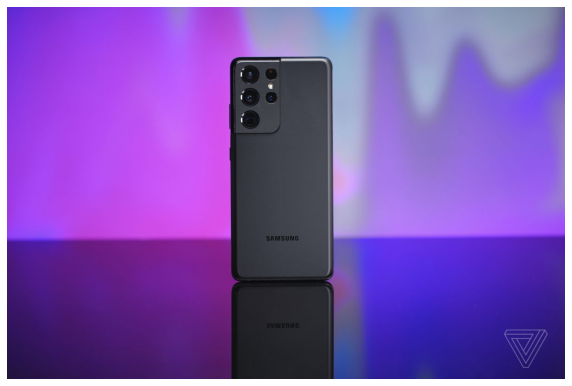

In [4]:
show_image(image)

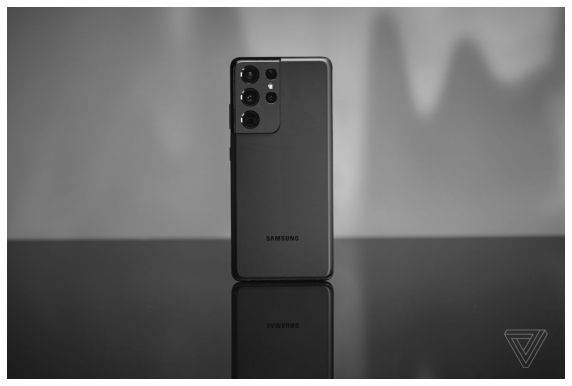

In [5]:
# Convert the image to grey
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show the grayed image
show_image(gray_img)

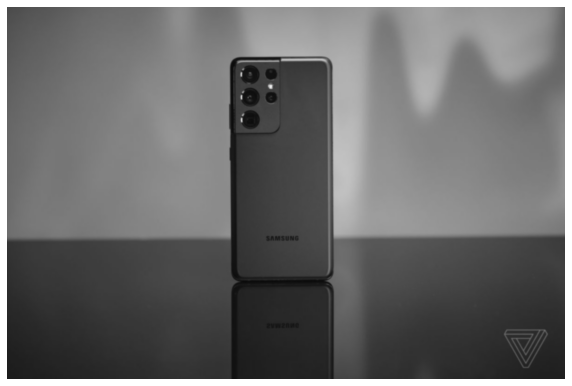

In [6]:
img = cv2.GaussianBlur(gray_img, (5, 5), sigmaX=0)
show_image(img)

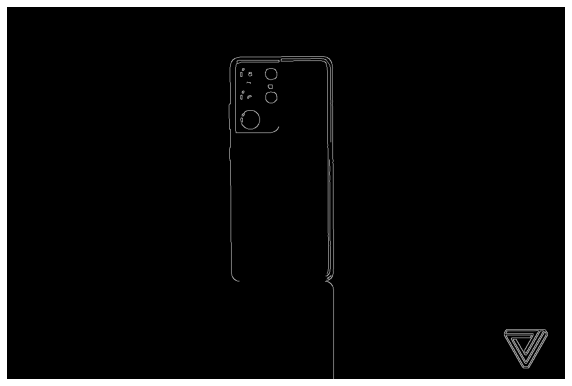

In [7]:
# find the canny edges
canny = cv2.Canny(img, 80, 160, L2gradient=True)
# show the canny image
show_image(canny)

In [8]:
# Find the countours
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [9]:
a = cv2.drawContours(image, contours, -1, (128, 255, 128), 2)

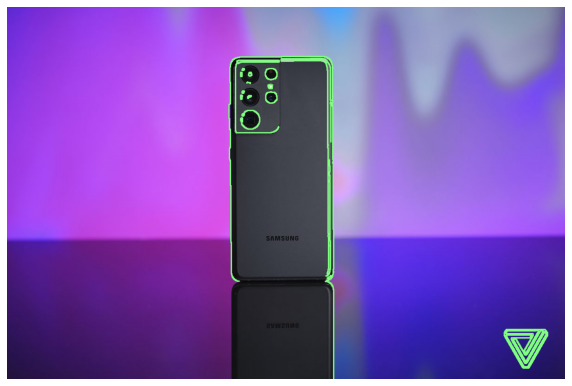

In [10]:
show_image(image)

In [11]:
# Save image to the output folder
path = 'images/processed-images/android-3.jpg'
cv2.imwrite(path, image)

True

In [12]:
# Create function that will do this in one step 
def detectEdge(filepath):
    # Load the file 
    img = cv2.imread(filepath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # Convert the image to gray
    gauss = cv2.GaussianBlur(gray, (5, 5), sigmaX=0)      # Use gaussian blur to blur the image
    canny = cv2.Canny(gauss, 80, 160, L2gradient=True)     # Use canny edge detection to get the edges
    
    # Get the conours of the image based on the canny image
    contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Draw the contours on the original image
    image = cv2.drawContours(img, contours, -1, (128, 255, 128), 2)
    
    return img

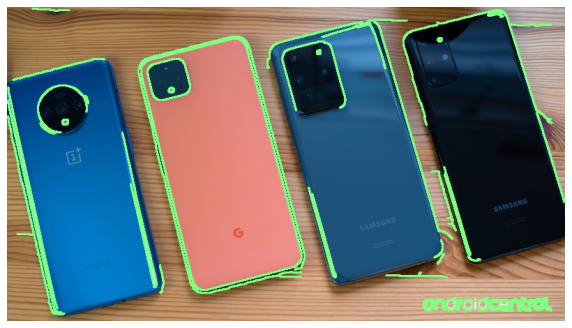

True

In [13]:
path = r'images\images\android-phones.jpg'
i = detectEdge(path)
show_image(i)
cv2.imwrite(r'images/processed-images/android-phones-contour.jpg', i)